# Module 11 Challenge Part 2

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import datetime64

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

In [8]:
# Create an empty list
weather_list = []
# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')
for row in rows:
    row_list = []
    cells = row.find_all('td')
    for cell in cells:
        row_list.append(cell.text)
    weather_list.append(row_list)
    
 
print(weather_list)

[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_list, columns=["id", "terrestial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [11]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis


In [12]:
# Examine data type of each column
weather_df.dtypes

id                 object
terrestial_date    object
sol                object
ls                 object
month              object
min_temp           object
pressure           object
dtype: object

In [13]:
# Change data types for data analysis
weather_df = weather_df.dropna(how = 'any')
weather_df = weather_df.astype({"id" : object, "terrestial_date" : datetime64, "sol" : int, 
                                "ls" : int, "month" : int, "min_temp" : float, "pressure" : float})


In [14]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                         object
terrestial_date    datetime64[ns]
sol                         int32
ls                          int32
month                       int32
min_temp                  float64
pressure                  float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
4. Which months have the lowest and the highest atmospheric pressure on Mars?
5. About how many terrestrial (Earth) days exist in a Martian year?



In [12]:
# 1. How many months are there on Mars?
month_df = weather_df[['id', 'month']]
month_count = month_df.groupby(month_df["month"]).count()
month_count

,id
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [13]:
# 2. How many Martian days' worth of data are there?
martian_days = weather_df['sol'].count()
martian_days

1867

In [14]:
# 3. What is the average low temperature by month?
temp_df = weather_df[['month', 'min_temp']]
avg_temp = temp_df.groupby(temp_df["month"]).mean()
avg_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


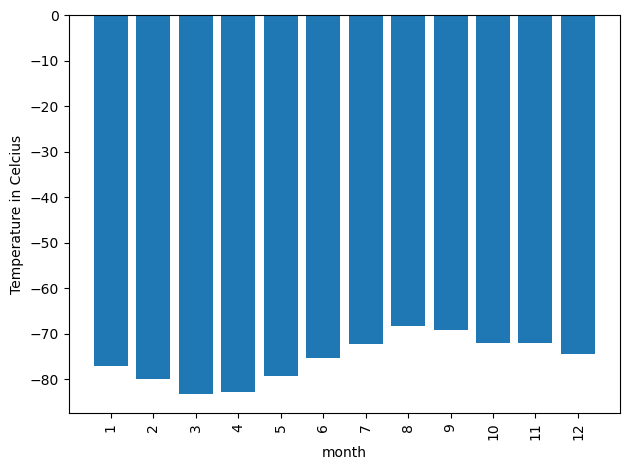

In [15]:
# Plot the average temperature by month
avg_temp = avg_temp.reset_index()
x_axis = avg_temp["month"]
y_axis = avg_temp["min_temp"]
plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = 'vertical')
plt.xlabel("month")
plt.ylabel("Temperature in Celcius")
plt.tight_layout()
plt.show()

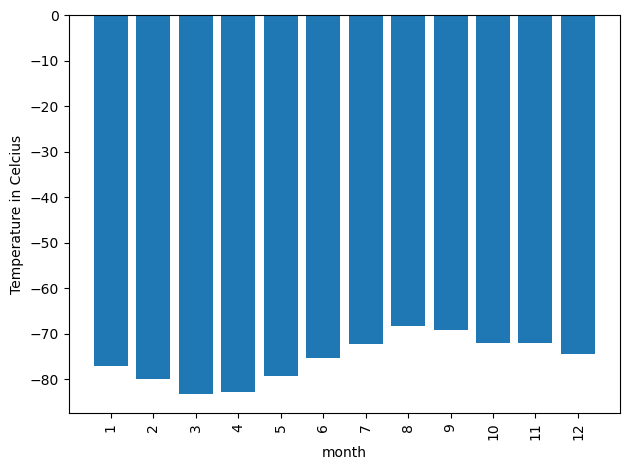

In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp = avg_temp.sort_values(by="min_temp", ascending=True)
x_axis = avg_temp["month"]
y_axis = avg_temp["min_temp"]
plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = 'vertical')
plt.xlabel("month")
plt.ylabel("Temperature in Celcius")
plt.tight_layout()
plt.show()


In [17]:
# 4. Average pressure by Martian month
pressure_df = weather_df[['month', 'pressure']]
avg_pressure = pressure_df.groupby(pressure_df["month"]).mean()
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


C:\Users\Tiffa\AppData\Local\Temp\ipykernel_5108\3634379792.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_pressure = weather_df.groupby("month", as_index=False).mean()


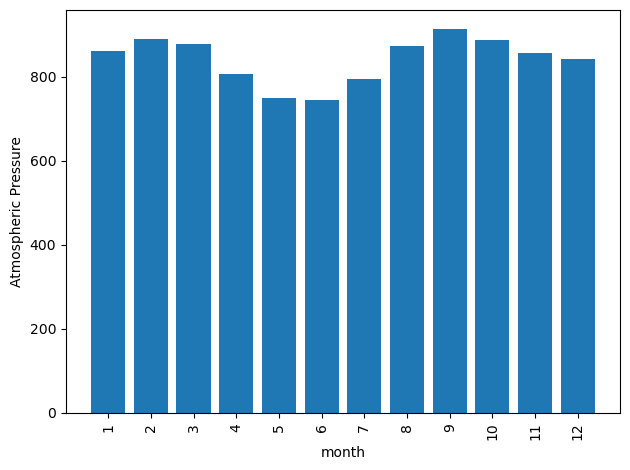

In [18]:
# Plot the average pressure by month
#avg_pressure = avg_pressure.reset_index()
sorted_pressure = weather_df.groupby("month", as_index=False).mean()
sorted_pressure = sorted_pressure.sort_values(by="pressure", ascending=True)
x_axis = sorted_pressure["month"]
y_axis = sorted_pressure["pressure"]
plt.bar(x_axis, y_axis, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = 'vertical')
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.tight_layout()
plt.show()


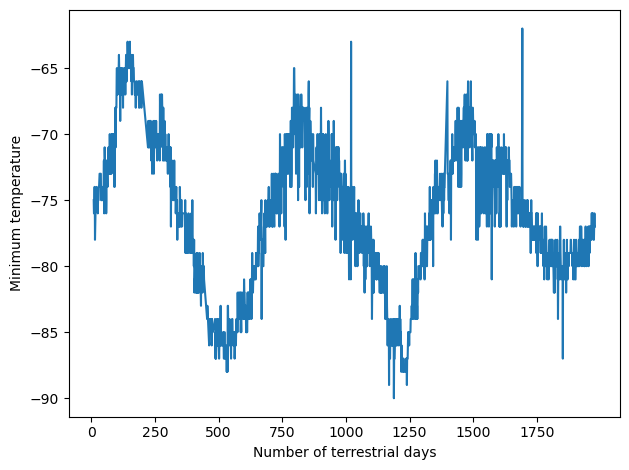

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
days_df = weather_df[["min_temp", "sol"]]
x_axis = days_df["sol"]
y_axis = days_df["min_temp"]
plt.plot(x_axis, y_axis)
tick_locations = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
tick_labels = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
plt.xticks(tick_locations, tick_labels)
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

In [24]:
# Write the data to a CSV
weather_df.to_csv("Mars_Weather.csv", index=False)

In [15]:
browser.quit()